# Comparing RC and generalized two terminal SSN linear circuit simulations in EMT Ph1 domain
### Comparing EMT domain simulations of Ph1 linear circuits built from Resistive Companion (RC) component models against the same linear circuits build from generalized two terminal SSN (State Space Nodal) component models.

## Run C++ examples: R1C1Vs, R1L1Vs and RLCVs circuits

In [23]:
import os
import subprocess

%matplotlib widget

name = "EMT_Ph1_General2TerminalSSN"

dpsim_path = (
    subprocess.Popen(["git", "rev-parse", "--show-toplevel"], stdout=subprocess.PIPE)
    .communicate()[0]
    .rstrip()
    .decode("utf-8")
)

path_exec = dpsim_path + "/build/dpsim/examples/cxx/"
sim = subprocess.Popen(
    [path_exec + name], stdout=subprocess.PIPE, stderr=subprocess.STDOUT
)
print(sim.communicate()[0].decode())

[16:02:37.295613 EMT_Ph1_General2TerminalSSN_C1R1Vs_RC info] Initialize simulation: EMT_Ph1_General2TerminalSSN_C1R1Vs_RC
[16:02:37.295790 MnaSolverFactory info] creating KLUAdapter solver implementation
[16:02:37.296293 EMT_Ph1_General2TerminalSSN_C1R1Vs_RC info] Scheduling tasks.
[16:02:37.296590 EMT_Ph1_General2TerminalSSN_C1R1Vs_RC info] Scheduling done.
[16:02:37.296672 EMT_Ph1_General2TerminalSSN_C1R1Vs_RC info] Opening interfaces.
[16:02:37.296681 EMT_Ph1_General2TerminalSSN_C1R1Vs_RC info] Start synchronization with remotes on interfaces
[16:02:37.296683 EMT_Ph1_General2TerminalSSN_C1R1Vs_RC info] Synchronized simulation start with remotes
[16:02:37.296687 EMT_Ph1_General2TerminalSSN_C1R1Vs_RC info] Start simulation: EMT_Ph1_General2TerminalSSN_C1R1Vs_RC
[16:02:37.296694 EMT_Ph1_General2TerminalSSN_C1R1Vs_RC info] Time step: 1.000000e-04
[16:02:37.296696 EMT_Ph1_General2TerminalSSN_C1R1Vs_RC info] Final time: 1.000000e-01
[16:02:37.308249 EMT_Ph1_General2TerminalSSN_C1R1Vs_RC i

### Load Results

In [24]:
from villas.dataprocessing.readtools import *
from villas.dataprocessing.timeseries import *
from villas.dataprocessing.timeseries import TimeSeries as ts
import matplotlib.pyplot as plt
import re
import numpy as np
import math

work_dir = os.getcwd() + "/logs/"
path_logfile_C1R1Vs_RC = work_dir + name + "_C1R1Vs_RC/" + name + "_C1R1Vs_RC" + ".csv"
ts_EMT_Ph1_C1R1Vs_RC = read_timeseries_dpsim(path_logfile_C1R1Vs_RC)
path_logfile_C1R1Vs_generalizedSSN = work_dir + name + "_C1R1Vs_generalizedSSN/" + name + "_C1R1Vs_generalizedSSN" + ".csv"
ts_EMT_Ph1_C1R1Vs_generalizedSSN = read_timeseries_dpsim(path_logfile_C1R1Vs_generalizedSSN)

path_logfile_L1R1Vs_RC = work_dir + name + "_L1R1Vs_RC/" + name + "_L1R1Vs_RC" + ".csv"
ts_EMT_Ph1_L1R1Vs_RC = read_timeseries_dpsim(path_logfile_L1R1Vs_RC)
path_logfile_L1R1Vs_generalizedSSN = work_dir + name + "_L1R1Vs_generalizedSSN/" + name + "_L1R1Vs_generalizedSSN" + ".csv"
ts_EMT_Ph1_L1R1Vs_generalizedSSN = read_timeseries_dpsim(path_logfile_L1R1Vs_generalizedSSN)

path_logfile_RLCVs_RC = work_dir + name + "_RLCVs_RC/" + name + "_RLCVs_RC" + ".csv"
ts_EMT_Ph1_RLCVs_RC = read_timeseries_dpsim(path_logfile_RLCVs_RC)
path_logfile_RLCVs_explicitSSN = work_dir + name + "_RLCVs_explicitSSN/" + name + "_RLCVs_explicitSSN" + ".csv"
ts_EMT_Ph1_RLCVs_explicitSSN = read_timeseries_dpsim(path_logfile_RLCVs_explicitSSN)
path_logfile_RLCVs_generalizedSSN = work_dir + name + "_RLCVs_generalizedSSN/" + name + "_RLCVs_generalizedSSN" + ".csv"
ts_EMT_Ph1_RLCVs_generalizedSSN = read_timeseries_dpsim(path_logfile_RLCVs_generalizedSSN)

column number: 2
results length: 1001
real column names: ['i_c_rc', 'v_c_rc']
complex column names: []
column number: 2
results length: 1001
real column names: ['i_c_genSSN', 'v_c_genSSN']
complex column names: []
column number: 2
results length: 1001
real column names: ['i_l_rc', 'v_l_rc']
complex column names: []
column number: 2
results length: 1001
real column names: ['i_l_genSSN', 'v_l_genSSN']
complex column names: []
column number: 2
results length: 1001
real column names: ['i_l_rlc_rc', 'v_l_rlc_rc']
complex column names: []
column number: 2
results length: 1001
real column names: ['i_rlc_explSSN', 'v_rlc_explSSN']
complex column names: []
column number: 2
results length: 1001
real column names: ['i_rlc_genSSN', 'v_rlc_genSSN']
complex column names: []


## Plot C1R1Vs circuit results

Text(0, 0.5, 'Capacitor Current [A]')

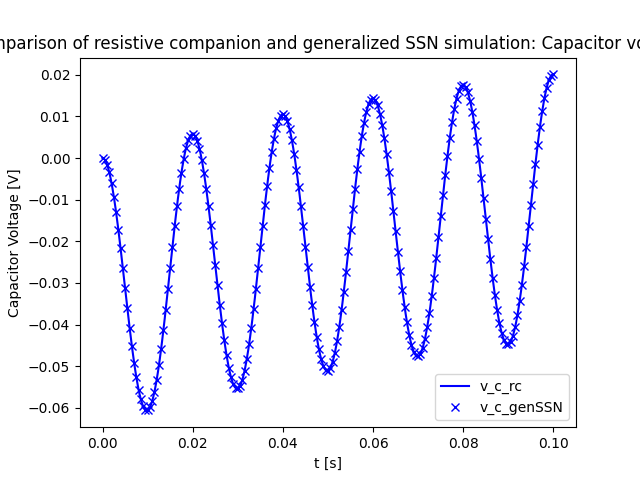

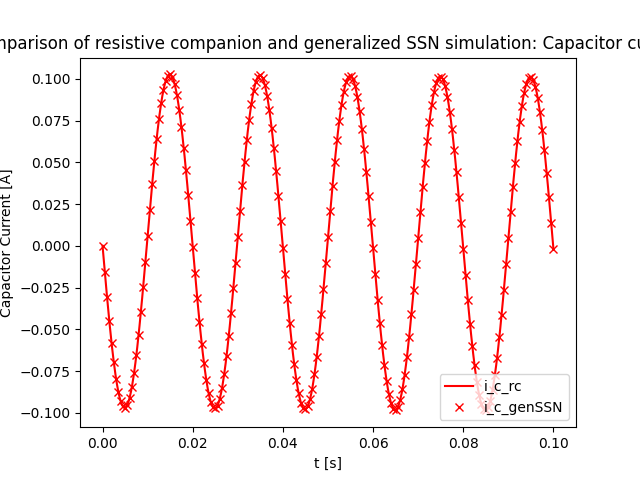

In [9]:
plt.close("all")
fig1 = plt.figure()

plt.plot(
    ts_EMT_Ph1_C1R1Vs_RC["v_c_rc"].time,
    ts_EMT_Ph1_C1R1Vs_RC["v_c_rc"].values,
    "b-",
    label="v_c_rc",
)
plt.plot(
    ts_EMT_Ph1_C1R1Vs_generalizedSSN["v_c_genSSN"].time,
    ts_EMT_Ph1_C1R1Vs_generalizedSSN["v_c_genSSN"].values,
    "bx",
    markevery=5,
    label="v_c_genSSN",
)

plt.legend(loc=4)

plt.title("RC vs generalized SSN simulation: Capacitor voltage")
plt.xlabel("t [s]")
plt.ylabel("Capacitor Voltage [V]")


fig2 = plt.figure()

plt.plot(
    ts_EMT_Ph1_C1R1Vs_RC["i_c_rc"].time,
    ts_EMT_Ph1_C1R1Vs_RC["i_c_rc"].values,
    "r-",
    label="i_c_rc",
)
plt.plot(
    ts_EMT_Ph1_C1R1Vs_generalizedSSN["i_c_genSSN"].time,
    ts_EMT_Ph1_C1R1Vs_generalizedSSN["i_c_genSSN"].values,
    "rx",
    markevery=5,
    label="i_c_genSSN",
)

plt.legend(loc=4)

plt.title("RC vs generalized SSN simulation: Capacitor current")
plt.xlabel("t [s]")
plt.ylabel("Capacitor Current [A]")

## Plot L1R1Vs circuit results

Text(0, 0.5, 'Inductor Current [A]')

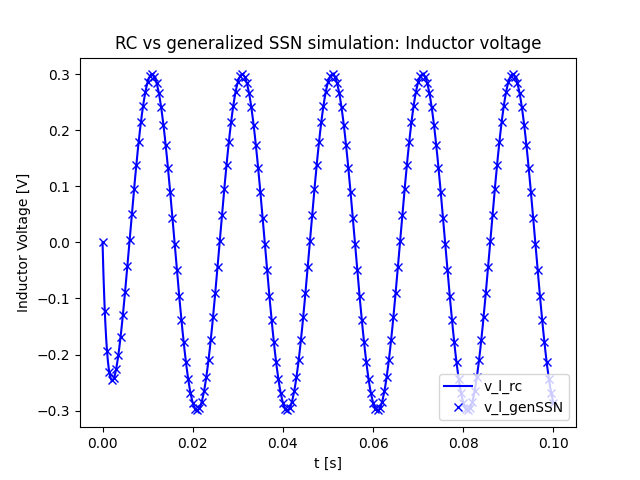

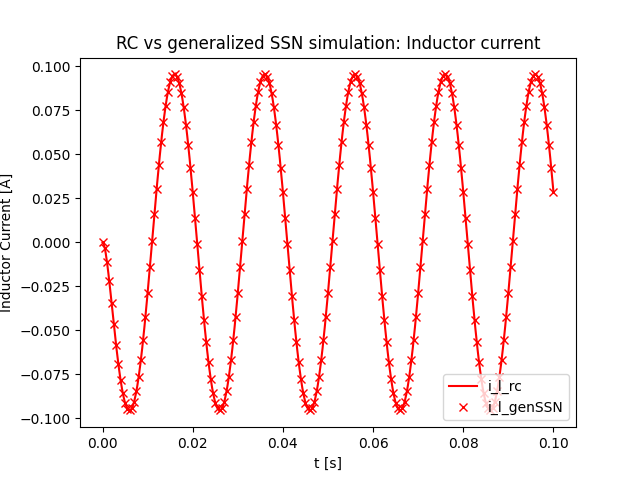

In [22]:
fig3 = plt.figure()

plt.plot(
    ts_EMT_Ph1_L1R1Vs_RC["v_l_rc"].time,
    ts_EMT_Ph1_L1R1Vs_RC["v_l_rc"].values,
    "b-",
    label="v_l_rc",
)
plt.plot(
    ts_EMT_Ph1_L1R1Vs_generalizedSSN["v_l_genSSN"].time,
    ts_EMT_Ph1_L1R1Vs_generalizedSSN["v_l_genSSN"].values,
    "bx",
    markevery=5,
    label="v_l_genSSN",
)

plt.legend(loc=4)

plt.title("RC vs generalized SSN simulation: Inductor voltage")
plt.xlabel("t [s]")
plt.ylabel("Inductor Voltage [V]")


fig4 = plt.figure()

plt.plot(
    ts_EMT_Ph1_L1R1Vs_RC["i_l_rc"].time,
    ts_EMT_Ph1_L1R1Vs_RC["i_l_rc"].values,
    "r-",
    label="i_l_rc",
)
plt.plot(
    ts_EMT_Ph1_L1R1Vs_generalizedSSN["i_l_genSSN"].time,
    ts_EMT_Ph1_L1R1Vs_generalizedSSN["i_l_genSSN"].values,
    "rx",
    markevery=5,
    label="i_l_genSSN",
)

plt.legend(loc=4)

plt.title("RC vs generalized SSN simulation: Inductor current")
plt.xlabel("t [s]")
plt.ylabel("Inductor Current [A]")

## Plot RLCVs circuit results

Text(0, 0.5, 'RLC branch current [A]')

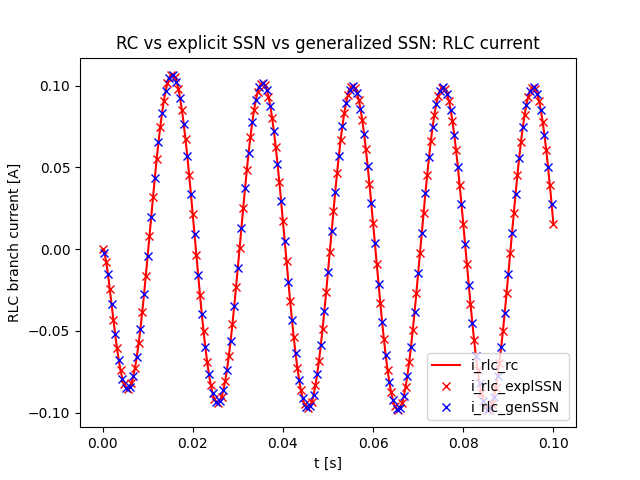

In [21]:
fig5 = plt.figure()

plt.plot(
    ts_EMT_Ph1_RLCVs_RC["i_l_rlc_rc"].time,
    ts_EMT_Ph1_RLCVs_RC["i_l_rlc_rc"].values,
    "r-",
    label="i_rlc_rc",
)
plt.plot(
    ts_EMT_Ph1_RLCVs_explicitSSN["i_rlc_explSSN"].time,
    ts_EMT_Ph1_RLCVs_explicitSSN["i_rlc_explSSN"].values,
    "rx",
    markevery=8,
    label="i_rlc_explSSN",
)
plt.plot(
    ts_EMT_Ph1_RLCVs_generalizedSSN["i_rlc_genSSN"].time,
    ts_EMT_Ph1_RLCVs_generalizedSSN["i_rlc_genSSN"].values,
    "bx",
    markevery=(4,8),
    label="i_rlc_genSSN",
)

plt.legend(loc=4)

plt.title("RC vs explicit SSN vs generalized SSN: RLC current")
plt.xlabel("t [s]")
plt.ylabel("RLC branch current [A]")

## Assert

In [27]:
epsilon = 1e-100

#Capacitor circuit
assert (
    np.max(
        ts_EMT_Ph1_C1R1Vs_RC["v_c_rc"].values
        - ts_EMT_Ph1_C1R1Vs_generalizedSSN["v_c_genSSN"].values
    )
    < epsilon
)
assert (
    np.max(
        ts_EMT_Ph1_C1R1Vs_RC["i_c_rc"].values
        - ts_EMT_Ph1_C1R1Vs_generalizedSSN["i_c_genSSN"].values
    )
    < epsilon
)

#Inductor circuit
assert (
    np.max(
        ts_EMT_Ph1_L1R1Vs_RC["v_l_rc"].values
        - ts_EMT_Ph1_L1R1Vs_generalizedSSN["v_l_genSSN"].values
    )
    < epsilon
)
assert (
    np.max(
        ts_EMT_Ph1_L1R1Vs_RC["i_l_rc"].values
        - ts_EMT_Ph1_L1R1Vs_generalizedSSN["i_l_genSSN"].values
    )
    < epsilon
)
    
#RLC circuit
assert (
    np.max(
        ts_EMT_Ph1_RLCVs_RC["i_l_rlc_rc"].values
        - ts_EMT_Ph1_RLCVs_explicitSSN["i_rlc_explSSN"].values
    )
    < epsilon
)
assert (
    np.max(
        ts_EMT_Ph1_RLCVs_RC["i_l_rlc_rc"].values
        - ts_EMT_Ph1_RLCVs_generalizedSSN["i_rlc_genSSN"].values
    )
    < epsilon
)
assert (
    np.max(
        ts_EMT_Ph1_RLCVs_explicitSSN["i_rlc_explSSN"].values
        - ts_EMT_Ph1_RLCVs_generalizedSSN["i_rlc_genSSN"].values
    )
    < epsilon
)